In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud

# 글꼴 설정

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [3]:
print(plt.rcParams['font.family'])

['sans-serif']


In [4]:
plt.rcParams['font.family']='NanumGothic'

# 2000년~2004년

- ISBN 부가기호: 첫째 자리는 독자대상 기호입니다.<br>
0 : 교양<br>
1 : 실용<br>
2 : 여성<br>
3 : 예비번호<br>
4 : 청소년<br>
5 : 중·고교용 학습참고서<br>
6 : 초등용 학습참고서<br>
7 : 아동<br>
8 : 예비번호<br>
9 : 전문·학술<br>
**4,5,6,7**

In [5]:
# 데이터 불러오기
df=pd.read_csv('booklist_child_00_04.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.10,"2,243",2000
1,2,"말할 수 있는 중국어, 들을 수 있는 중국어:생활회화",류기수 지음,백산서당,1997,NaN,9.788970e+12,3720.0,727.50,"1,697",2000
2,3,윤효석 작품집,尹孝錫 著,梨花文化出版社,1997,NaN,9.788980e+12,3570.0,648.00,972,2000
3,4,여자는 모른다,이시형 지음,살림출판사,1999,NaN,9.788950e+12,3810.0,181.71,872,2000
4,5,모순:양귀자 장편소설,양귀자 지음,살림출판사,1998,NaN,9.788990e+12,3810.0,813.60,609,2000


In [6]:
total_sum00_04=df['대출건수'].str.replace(',','').astype('int').sum()

In [7]:
pd.isnull(df['ISBN부가기호']).sum()

32

In [8]:
# 결측치 제거
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.10,"2,243",2000
1,1,2,"말할 수 있는 중국어, 들을 수 있는 중국어:생활회화",류기수 지음,백산서당,1997,NaN,9.788970e+12,3720.0,727.50,"1,697",2000
2,2,3,윤효석 작품집,尹孝錫 著,梨花文化出版社,1997,NaN,9.788980e+12,3570.0,648.00,972,2000
3,3,4,여자는 모른다,이시형 지음,살림출판사,1999,NaN,9.788950e+12,3810.0,181.71,872,2000
4,4,5,모순:양귀자 장편소설,양귀자 지음,살림출판사,1998,NaN,9.788990e+12,3810.0,813.60,609,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
963,995,195,황태자비 납치사건:김진명 장편소설,김진명 지음,해냄,2001,1.0,9.788970e+12,3810.0,813.60,717,2004
964,996,195,(후루룩 냠냠)라면 기차,이노우에 요스케 글·그림;양선하 [공]옮김,한국어린이교육연구원,2002,NaN,9.788980e+12,77830.0,375.10,717,2004
965,997,198,(만화로 보는)북유럽 신화,강주현 구성;신영미 그림,창해,2002-2003,4.0,9.788980e+12,77210.0,219.00,716,2004
966,998,199,(TV동화) 행복한 세상,"이미애, 박인식 (지은이)",샘터사,2002-2011,2.0,9.788950e+12,4810.0,813.80,715,2004


In [9]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [106]:
df.head()

,year,baby_num,total_ratio
0,1987,624.0,1.53
1,1988,633.0,1.55
2,1989,639.0,1.56
3,1990,650.0,1.57
4,1991,709.0,1.71


In [11]:
# ISBN부가기호에 따라 4,5,6,7번인 아동대상 도서 추출

number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [12]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book00_04=len(filter_number)

애들 책 수: 	619


In [13]:
df=df.loc[filter_number,:].reset_index()

In [14]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum00_04=df['대출건수'].sum()

아이 책 대출건수는 387498 이다.


In [15]:
# 도서명 내 특수기호 제거
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [16]:
# 도서명 -> 띄어쓰기 기준으로 단어단위로 분리
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['뚱딴지', '명언', '산책'],
 ['만화로', '보는신라', '왕조', '1000년'],
 ['웃음천국텔레토비와', '사오정'],
 ['만화로', '보는고려', '왕조', '500년'],
 ['만화로', '보는고구려', '왕조', '700년']]

In [23]:
# 단어 빈도 세기
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('뚱딴지', 23053), ('명언', 17819), ('산책', 17819), ('만화로', 53444), ('보는신라', 1168)]

In [24]:
# 빈도 많은 순으로 정렬해보기
sorted(mdict.items(),key=lambda x:x[1],reverse=True)

[('만화로', 53444),
 ('신화', 40390),
 ('로마', 30179),
 ('보는그리스', 28616),
 ('뚱딴지', 23053),
 ('명언', 17819),
 ('산책', 17819),
 ('된', 12994),
 ('이야기', 12153),
 ('부자가', 11477),
 ('살아남기', 10367),
 ('살에', 8765),
 ('동화집', 8360),
 ('보는북유럽', 8185),
 ('키라', 7744),
 ('내', 6650),
 ('새먼나라', 6641),
 ('이웃나라', 6641),
 ('우리', 6038),
 ('아이', 5953),
 ('엄마', 5799),
 ('초등학생이', 5409),
 ('가장', 5256),
 ('누리야', 5162),
 ('왕조', 5135),
 ('만화열두', 5087),
 ('to', 5081),
 ('만화', 4905),
 ('열두', 4811),
 ('수수깡', 4432),
 ('안경이영철', 4432),
 ('100가지', 4388),
 ('생각', 4254),
 ('어린이', 4242),
 ('보는가시고기', 4188),
 ('난', 4012),
 ('들려주는', 3976),
 ('일기', 3927),
 ('되어', 3777),
 ('아이들', 3753),
 ('명탐정', 3379),
 ('호기심', 3329),
 ('만화삼국지', 3329),
 ('나쁜', 3290),
 ('표', 3290),
 ('왕따', 3288),
 ('언니', 3226),
 ('비밀', 3213),
 ('갑수', 3186),
 ('500년', 3146),
 ('왜', 3141),
 ('괜찮아', 3080),
 ('형', 3065),
 ('집', 3040),
 ('700년', 3027),
 ('우리들의', 2952),
 ('일그러진', 2952),
 ('영웅', 2952),
 ('꼭', 2930),
 ('I', 2927),
 ('바람의', 2903),
 ('아이한석청', 2903),
 ('장편', 2903

In [25]:
font_path='C:/Windows/Fonts/NanumGothic.ttf'

In [26]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


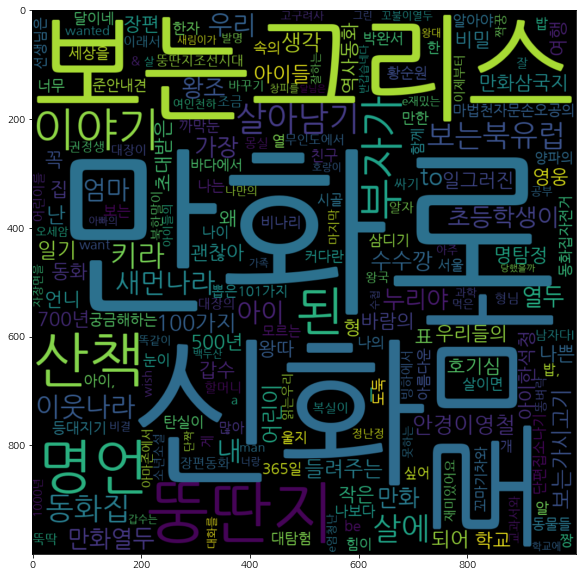

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 2005~2009

In [29]:
df=pd.read_csv('booklist_child_05_09.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.1,"5,396",2005
1,2,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,4.0,9.788950e+12,77720.0,711.4,"2,885",2005
2,3,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,5.0,9.788950e+12,77720.0,711.4,"2,805",2005
3,4,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,2.0,9.788950e+12,77720.0,711.4,"2,793",2005
4,5,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,6.0,9.788950e+12,77720.0,711.4,"2,770",2005


In [30]:
total_sum05_09=df['대출건수'].str.replace(',','').astype('int').sum()
total_sum05_09

2138288

In [31]:
pd.isnull(df['ISBN부가기호']).sum()

2

In [32]:
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df.head()

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.1,"5,396",2005
1,1,2,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,4.0,9.788950e+12,77720.0,711.4,"2,885",2005
2,2,3,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,5.0,9.788950e+12,77720.0,711.4,"2,805",2005
3,3,4,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,2.0,9.788950e+12,77720.0,711.4,"2,793",2005
4,4,5,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,6.0,9.788950e+12,77720.0,711.4,"2,770",2005


In [33]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [34]:
number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [35]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book05_09=len(filter_number)

애들 책 수: 	821


In [36]:
df=df.loc[filter_number,:].reset_index()

In [37]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum05_09=df['대출건수'].sum()

아이 책 대출건수는 1730152 이다.


In [38]:
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [39]:
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['뚱딴지', '명언', '산책'],
 ['마법천자문손오공의', '한자', '대탐험'],
 ['마법천자문손오공의', '한자', '대탐험'],
 ['마법천자문손오공의', '한자', '대탐험'],
 ['마법천자문손오공의', '한자', '대탐험']]

In [40]:
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('뚱딴지', 18481),
 ('명언', 18481),
 ('산책', 18481),
 ('마법천자문손오공의', 99261),
 ('한자', 191558)]

In [41]:
sorted(mdict.items(),key=lambda x:x[1],reverse=True)

[('한자', 191558),
 ('대탐험', 191558),
 ('Why', 159715),
 ('살아남기', 158323),
 ('마법의', 144181),
 ('보물찾기', 136345),
 ('시간여행', 132792),
 ('만화로', 119626),
 ('신화', 116376),
 ('마법천자문손오공의', 99261),
 ('마법천자문', 92297),
 ('손오공의', 92297),
 ('KBS', 65572),
 ('위기탈출', 65572),
 ('넘버원', 65572),
 ('보는그리스', 62140),
 ('로마', 62140),
 ('만화', 57462),
 ('엽기', 48278),
 ('과학자', 48278),
 ('프래니', 48278),
 ('21세기먼나라', 47600),
 ('이웃나라', 47600),
 ('보는중국', 47180),
 ('내일은', 40728),
 ('실험왕', 40728),
 ('본격', 40728),
 ('대결', 40728),
 ('과학실험', 40728),
 ('어린이를', 33060),
 ('위한', 33060),
 ('과학', 29200),
 ('곤충', 20800),
 ('날', 19981),
 ('세계에서', 19951),
 ('일기', 19138),
 ('뚱딴지', 18481),
 ('명언', 18481),
 ('산책', 18481),
 ('내', 18140),
 ('우리', 17656),
 ('된', 16413),
 ('이야기', 16020),
 ('두', 15224),
 ('율리시스', 13850),
 ('무어', 13850),
 ('부자가', 13820),
 ('한국사', 13768),
 ('바로보기', 13768),
 ('집', 13635),
 ('지진에서', 13093),
 ('교과서', 13081),
 ('살에', 13063),
 ('엄마', 12666),
 ('산에서', 12552),
 ('수학', 12488),
 ('똥', 12448),
 ('동굴에서', 12044),
 ('바다에서

In [42]:
font_path='C:/Windows/Fonts/NanumGothic.ttf'

In [43]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


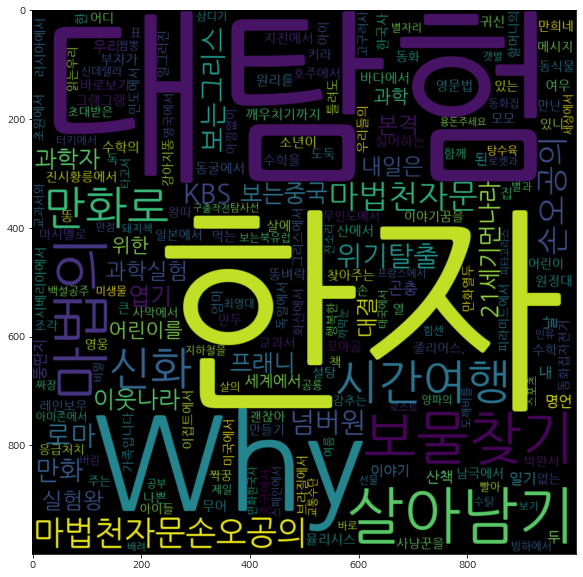

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 2010~ 2014

In [56]:
df=pd.read_csv('booklist_child_10_14.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9.788940e+12,3810.0,813.7,"5,772",2010
1,2,Why? 나라의 시작,글: 이근 ;그림: 극동만화연구소,예림당,2009,1.0,9.788930e+12,73910.0,911.0,"5,078",2010
2,3,내일은 실험왕 :본격 대결 과학실험 만화,글: 곰돌이 co. ;그림: 홍종현,대한교과서,2006-2008,9.0,9.788940e+12,77400.0,400.0,"4,996",2010
3,4,(KBS 위기탈출) 넘버원,구성: 에듀코믹 ;원 프로덕션,밝은미래,2006-2015,2.0,9.789000e+12,77810.0,539.0,"4,764",2010
4,5,Why? 고려 시대,글: 이근 ;그림: 극동만화연구소,예림당,2009,3.0,9.788930e+12,73910.0,911.0,"4,712",2010


In [57]:
total_sum10_14=df['대출건수'].str.replace(',','').astype('int').sum()

In [58]:
pd.isnull(df['ISBN부가기호']).sum()

3

In [59]:
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df.head()

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9.788940e+12,3810.0,813.7,"5,772",2010
1,1,2,Why? 나라의 시작,글: 이근 ;그림: 극동만화연구소,예림당,2009,1.0,9.788930e+12,73910.0,911.0,"5,078",2010
2,2,3,내일은 실험왕 :본격 대결 과학실험 만화,글: 곰돌이 co. ;그림: 홍종현,대한교과서,2006-2008,9.0,9.788940e+12,77400.0,400.0,"4,996",2010
3,3,4,(KBS 위기탈출) 넘버원,구성: 에듀코믹 ;원 프로덕션,밝은미래,2006-2015,2.0,9.789000e+12,77810.0,539.0,"4,764",2010
4,4,5,Why? 고려 시대,글: 이근 ;그림: 극동만화연구소,예림당,2009,3.0,9.788930e+12,73910.0,911.0,"4,712",2010


In [60]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [61]:
number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [62]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book10_14=len(filter_number)

애들 책 수: 	912


In [63]:
df=df.loc[filter_number,:].reset_index()

In [64]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum10_14=df['대출건수'].sum()

아이 책 대출건수는 3517344 이다.


In [65]:
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [68]:
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['Why', '나라의', '시작'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['KBS', '위기탈출', '넘버원'],
 ['Why', '고려', '시대'],
 ['베트남에서', '보물찾기']]

In [69]:
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('Why', 318970),
 ('나라의', 12902),
 ('시작', 12902),
 ('내일은', 479888),
 ('실험왕', 437434)]

In [70]:
sorted(mdict.items(),key=lambda x:x[1],reverse=True)

[('만화', 491169),
 ('내일은', 479888),
 ('본격', 479888),
 ('대결', 479888),
 ('코믹', 464854),
 ('수학도둑', 464854),
 ('국내', 464854),
 ('최초', 464854),
 ('수학논술만화', 464854),
 ('실험왕', 437434),
 ('과학실험', 437434),
 ('메이플스토리', 424274),
 ('사고력과', 424274),
 ('이해력을', 424274),
 ('향상시켜', 424274),
 ('주는', 424274),
 ('보물찾기', 386433),
 ('위기탈출', 350364),
 ('넘버원', 350364),
 ('KBS', 339083),
 ('Why', 318970),
 ('한자', 258868),
 ('대탐험', 258868),
 ('살아남기', 235309),
 ('과학', 230289),
 ('어린이', 214810),
 ('형사대', 214810),
 ('CSI', 214810),
 ('마법천자문', 177733),
 ('손오공의', 177733),
 ('제로니모의', 166759),
 ('환상모험', 166759),
 ('엽기', 104725),
 ('과학자', 104725),
 ('프래니', 104725),
 ('윔피', 88059),
 ('키드', 88059),
 ('마법천자문손오공의', 81135),
 ('그램그램', 77557),
 ('영문법', 77557),
 ('원정대', 77557),
 ('정글에서', 71410),
 ('발명왕', 42454),
 ('과학발명', 42454),
 ('메이플', 40580),
 ('스토리', 40580),
 ('시대', 35716),
 ('집', 30331),
 ('고구려', 26706),
 ('만화로', 25510),
 ('보는그리스', 25510),
 ('로마', 25510),
 ('신화', 25510),
 ('조선', 24803),
 ('마법의', 23626),
 ('거짓말', 21606),


In [71]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


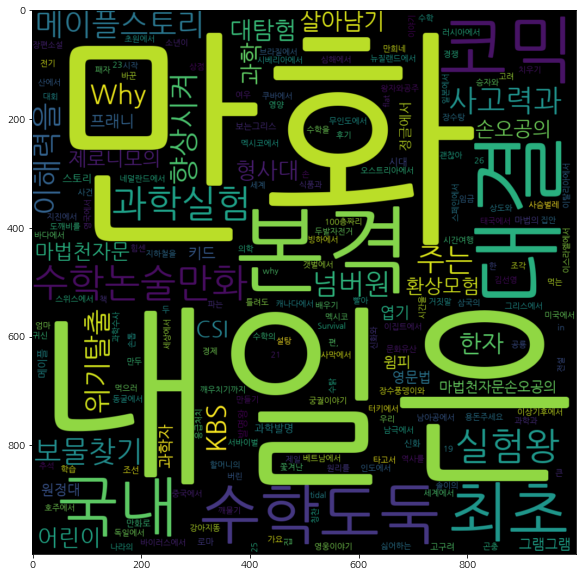

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 2015~ 2019

In [73]:
df=pd.read_csv('booklist_child_15_19.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9788936433673,3810.0,813.7,"5,695",2015
1,2,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,25.0,9788937884085,77400.0,400.0,"5,586",2015
2,3,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,24.0,9788937884078,77400.0,400.0,"5,321",2015
3,4,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,21.0,9788937884047,77400.0,400.0,"5,261",2015
4,5,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,22.0,9788937884054,77400.0,400.0,"5,251",2015


In [74]:
total_sum15_19=df['대출건수'].str.replace(',','').astype('int').sum()

In [75]:
pd.isnull(df['ISBN부가기호']).sum()

65

In [76]:
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9788936433673,3810.0,813.7,"5,695",2015
1,1,2,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,25.0,9788937884085,77400.0,400.0,"5,586",2015
2,2,3,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,24.0,9788937884078,77400.0,400.0,"5,321",2015
3,3,4,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,21.0,9788937884047,77400.0,400.0,"5,261",2015
4,4,5,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,22.0,9788937884054,77400.0,400.0,"5,251",2015
...,...,...,...,...,...,...,...,...,...,...,...,...
930,995,196,(코믹 메이플스토리) 수학도둑 :사고력과 이해력을 향상시켜 주는 국내 최초 수학논술만화,글: 송도수 ;서정 엔터테인먼트,서울문화사,2006-2015,17.0,9788926390276,77810.0,410.0,"2,974",2019
931,996,197,(코믹 메이플스토리) 수학도둑 :사고력과 이해력을 향상시켜 주는 국내 최초 수학논술만화,글: 송도수 ;서정 엔터테인먼트,서울문화사,2006-2015,28.0,9788926393581,67410.0,410.0,"2,971",2019
932,997,198,(코믹 메이플스토리) 수학도둑 :사고력과 이해력을 향상시켜 주는 국내 최초 수학논술만화,글: 송도수 ;서정 엔터테인먼트,서울문화사,2006-2015,27.0,9788926391846,67410.0,410.0,"2,970",2019
933,998,198,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,21.0,9788937884047,77400.0,400.0,"2,970",2019


In [77]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [78]:
number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [79]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book15_19=len(filter_number)

애들 책 수: 	869


In [80]:
df=df.loc[filter_number,:].reset_index()

In [81]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum15_19=df['대출건수'].sum()

아이 책 대출건수는 3349819 이다.


In [82]:
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [83]:
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['마법천자문', '손오공의', '한자', '대탐험']]

In [84]:
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('내일은', 972993),
 ('실험왕', 614496),
 ('본격', 972993),
 ('대결', 969993),
 ('과학실험', 614496)]

In [85]:
sorted(mdict.items(),key=lambda x:x[1],reverse=True)

[('내일은', 972993),
 ('본격', 972993),
 ('만화', 972993),
 ('대결', 969993),
 ('코믹', 689225),
 ('수학도둑', 689225),
 ('메이플스토리', 618036),
 ('실험왕', 614496),
 ('과학실험', 614496),
 ('주는', 591338),
 ('국내', 539209),
 ('최초', 539209),
 ('수학논술만화', 539209),
 ('사고력과', 468020),
 ('이해력을', 468020),
 ('향상시켜', 468020),
 ('마법천자문', 377704),
 ('손오공의', 377704),
 ('한자', 377704),
 ('대탐험', 377704),
 ('발명왕', 355497),
 ('과학발명', 355497),
 ('과학', 260489),
 ('어린이', 172027),
 ('형사대', 172027),
 ('CSI', 172027),
 ('Why', 127081),
 ('스토리텔링', 126318),
 ('창의사고력', 123318),
 ('강화,', 123318),
 ('수리논술력을', 123318),
 ('키워', 123318),
 ('수학의', 123318),
 ('선구자', 123318),
 ('윔피', 121616),
 ('키드', 121616),
 ('집', 120712),
 ('쿠키런', 117481),
 ('어드벤처', 117481),
 ('쿠키들의', 117481),
 ('신나는', 117481),
 ('세계여행', 117481),
 ('설민석의', 103932),
 ('대모험', 103932),
 ('한국사', 100434),
 ('추리', 78311),
 ('천재', 78311),
 ('엉덩이', 78311),
 ('탐정', 78311),
 ('메이플', 71189),
 ('스토리', 71189),
 ('놓지', 70833),
 ('마', 70833),
 ('100층짜리', 57385),
 ('나무', 56749),
 ('제로니모의', 4

In [86]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


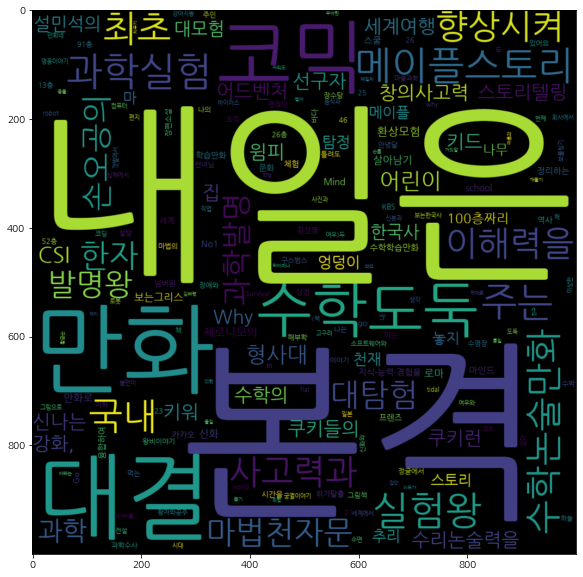

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 추이 시각화

In [88]:
total_sum=[]
total_sum.append(total_sum00_04)
total_sum.append(total_sum05_09)
total_sum.append(total_sum10_14)
total_sum.append(total_sum15_19)
total_sum

[603881, 2138288, 3874043, 3846900]

In [89]:
child_book=[]
child_book.append(child_book00_04)
child_book.append(child_book05_09)
child_book.append(child_book10_14)
child_book.append(child_book15_19)
child_book

[619, 821, 912, 869]

In [90]:
child_sum=[]
child_sum.append(child_sum00_04)
child_sum.append(child_sum05_09)
child_sum.append(child_sum10_14)
child_sum.append(child_sum15_19)
child_sum

[387498, 1730152, 3517344, 3349819]

In [91]:
start_year=[2000,2005,2010,2015]

Text(0.5, 1.0, '전체 대출 권수')

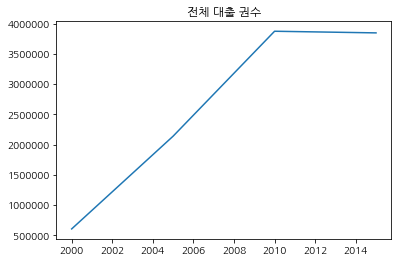

In [92]:
plt.plot(start_year,total_sum)
plt.title('전체 대출 권수')

Text(0.5, 1.0, '아동용 책 비율')

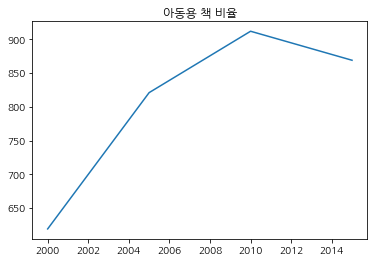

In [107]:
plt.plot(start_year,child_book)
plt.title('아동용 책 비율')

Text(0.5, 1.0, '아동 도서 대출 권수')

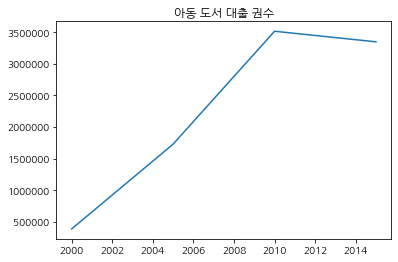

In [94]:
plt.plot(start_year,child_sum)
plt.title('아동 도서 대출 권수')

# 아동들이 줄어들었나 확인
- **도서관 이용 고객 중 아동나이: 0세 ~ 13세** 
- 2000년도 이용나이대 출생년도: 2000년 ~ 1987년
- 2001년도 이용나이대 출생년도: 2001년 ~ 1988년
- 2002년도 이용나이대 출생년도: 2002년 ~ 1989년
- 2003년도 이용나이대 출생년도: 2003년 ~ 1990년
- 2004년도 이용나이대 출생년도: 2004년 ~ 1991년
- 2005년도 이용나이대 출생년도: 2005년 ~ 1992년
- 2006년도 이용나이대 출생년도: 2006년 ~ 1993년
- 2007년도 이용나이대 출생년도: 2007년 ~ 1994년
- 2008년도 이용나이대 출생년도: 2008년 ~ 1995년
- 2009년도 이용나이대 출생년도: 2009년 ~ 1996년
- 2010년도 이용나이대 출생년도: 2010년 ~ 1997년
- 2011년도 이용나이대 출생년도: 2011년 ~ 1998년
- 2012년도 이용나이대 출생년도: 2012년 ~ 1999년
- 2013년도 이용나이대 출생년도: 2013년 ~ 2000년
- 2014년도 이용나이대 출생년도: 2014년 ~ 2001년
- 2015년도 이용나이대 출생년도: 2015년 ~ 2002년
- 2016년도 이용나이대 출생년도: 2016년 ~ 2003년
- 2017년도 이용나이대 출생년도: 2017년 ~ 2004년
- 2018년도 이용나이대 출생년도: 2018년 ~ 2005년
- 2019년도 이용나이대 출생년도: 2019년 ~ 2006년

In [95]:
import pandas as pd

In [96]:
df=pd.read_csv('baby_num_from1987.csv')
df

,year,baby_num,total_ratio
0,1987,624.0,1.530
1,1988,633.0,1.550
2,1989,639.0,1.560
3,1990,650.0,1.570
4,1991,709.0,1.710
5,1992,731.0,1.760
6,1993,716.0,1.654
7,1994,721.0,1.656
8,1995,715.0,1.634
9,1996,691.0,1.574


In [97]:
df=df.iloc[:,:].reset_index(drop=True)
df

,year,baby_num,total_ratio
0,1987,624.0,1.530
1,1988,633.0,1.550
2,1989,639.0,1.560
3,1990,650.0,1.570
4,1991,709.0,1.710
5,1992,731.0,1.760
6,1993,716.0,1.654
7,1994,721.0,1.656
8,1995,715.0,1.634
9,1996,691.0,1.574


In [98]:
year=list(df['year'])
print(year)
year.append(2019)
num=list(df['baby_num'])
print(num)
num.append(0)

[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[624.0, 633.0, 639.0, 650.0, 709.0, 731.0, 716.0, 721.0, 715.0, 691.0, 675.4, 641.6, 620.7, 640.1, 559.9, 496.9, 495.0, 477.0, 438.7, 451.8, 496.8, 465.9, 444.8, 470.2, 471.3, 484.6, 436.5, 435.4, 438.4, 406.2, 357.8, 326.8]


In [99]:
start_year=[2000,2005,2010,2015]

In [100]:
len(num)

33

In [101]:
# 매 년마다 0세 ~ 13세 아동 수 더하기

baby={}
start_idx=0
for y in range(2000,2020):
    inner=num[start_idx:start_idx+13]
    print(year[start_idx],end='\t')
    print(year[start_idx+13])
    start_idx+=1
    baby[int(y)]=sum(inner)

print(baby)

1987	2000
1988	2001
1989	2002
1990	2003
1991	2004
1992	2005
1993	2006
1994	2007
1995	2008
1996	2009
1997	2010
1998	2011
1999	2012
2000	2013
2001	2014
2002	2015
2003	2016
2004	2017
2005	2018
2006	2019
{2000: 8766.7, 2001: 8782.8, 2002: 8709.7, 2003: 8567.6, 2004: 8412.599999999999, 2005: 8180.599999999999, 2006: 7888.299999999999, 2007: 7624.099999999999, 2008: 7399.9, 2009: 7150.799999999999, 2010: 6904.6, 2011: 6699.400000000001, 2012: 6529.1, 2013: 6393.000000000001, 2014: 6189.400000000001, 2015: 6064.900000000001, 2016: 6006.4, 2017: 5917.599999999999, 2018: 5798.4, 2019: 5686.5}


In [102]:
# 아동수 리스트 생성
year=[]
num=[]
for k,v in baby.items():
    year.append(k)
    num.append(v)
print(year)
print(num)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[8766.7, 8782.8, 8709.7, 8567.6, 8412.599999999999, 8180.599999999999, 7888.299999999999, 7624.099999999999, 7399.9, 7150.799999999999, 6904.6, 6699.400000000001, 6529.1, 6393.000000000001, 6189.400000000001, 6064.900000000001, 6006.4, 5917.599999999999, 5798.4, 5686.5]


In [103]:
# 5년 단위로 아동수 합하기
number=[]
for i,v in enumerate(year):
    if i%5==0:
        number.append(sum(num[i:i+4]))
number

[34826.8, 31092.899999999994, 26526.1, 23787.299999999996]

In [104]:
# 아동수 증감 비교
print(number[0]-number[1])
print(number[1]-number[2])
print(number[2]-number[3])

3733.9000000000087
4566.799999999996
2738.800000000003


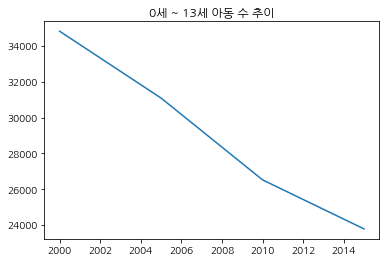

In [109]:
start_year=[2000,2005,2010,2015]
import matplotlib.pyplot as plt
plt.plot(start_year,number)
plt.title('0세 ~ 13세 아동 수 추이')
plt.show()